In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
import pandas as pd

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '37d6f5c2-06c2-4985-8216-0fb532f93fe1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
print(data)

{'status': {'timestamp': '2024-03-27T16:47:17.868Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9294}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10943, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe
pd.json_normalize(data)
df = pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now')
df

C:\ProgramData\Anaconda3\envs\ML2023\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10943,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.966579e+07,1.966579e+07,False,NaN,1,NaN,NaN,None,2024-03-27T16:46:00.000Z,69157.850142,3.974853e+10,-2.2531,0.175908,-0.634863,9.698850,29.779941,65.357037,62.686684,1.360044e+12,52.1610,1.452315e+12,None,2024-03-27T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:47:18.258811
1,1027,Ethereum,ETH,ethereum,8659,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200732e+08,1.200732e+08,True,NaN,2,NaN,NaN,None,2024-03-27T16:45:00.000Z,3515.588735,1.864639e+10,-8.6256,-0.441870,-0.945272,8.940312,11.650888,54.945887,48.081264,4.221280e+11,16.1896,4.221280e+11,None,2024-03-27T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:47:18.258811
2,825,Tether USDt,USDT,tether,80397,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.043621e+11,1.077926e+11,True,NaN,3,NaN,NaN,None,2024-03-27T16:45:00.000Z,0.999629,8.330591e+10,-0.0587,0.003464,-0.033352,-0.037102,-0.022286,-0.040406,-0.071222,1.043234e+11,4.0011,1.077526e+11,None,2024-03-27T16:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-27 16:47:18.258811
3,1839,BNB,BNB,bnb,2124,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495366e+08,1.495366e+08,False,NaN,4,NaN,NaN,None,2024-03-27T16:45:00.000Z,570.473847,2.017796e+09,-5.3470,-0.260967,-0.526339,10.688387,43.493490,88.064081,72.670981,8.530671e+10,3.2717,8.530671e+10,None,2024-03-27T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:47:18.258811
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.443051e+08,5.727473e+08,True,NaN,5,NaN,NaN,None,2024-03-27T16:45:00.000Z,182.565760,3.956696e+09,9.4951,0.012943,-2.539697,8.709607,70.837704,96.709867,84.286428,8.111490e+10,3.1103,1.045640e+11,None,2024-03-27T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:47:18.258811
5,52,XRP,XRP,xrp,1279,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.488424e+10,9.998776e+10,False,NaN,6,NaN,NaN,None,2024-03-27T16:46:00.000Z,0.613481,2.027394e+09,-7.3717,-0.180463,-2.191208,6.486480,12.547076,15.698096,-2.768139,3.367045e+10,1.2913,6.134812e+10,None,2024-03-27T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:47:18.258811
6,3408,USDC,USDC,usd-coin,17676,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.215913e+10,3.215913e+10,False,NaN,7,NaN,NaN,None,2024-03-27T16:45:00.000Z,1.000120,1.001041e+10,17.9414,0.025593,0.024253,0.003539,0.050334,-0.011815,-0.010128,3.216301e+10,1.2335,3.216301e+10,None,2024-03-27T16:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-27 16:47:18.258811
7,74,Dogecoin,DOGE,dogecoin,939,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.436415e+11,1.436415e+11,True,NaN,8,NaN,NaN,None,2024-03-27T16:46:00.000Z,0.187261,3.683649e+09,25.7328,-0.770837,6.714210,44.536812,114.482722,134.838346,104.591056,2.689846e+10,1.0316,2.689846e+10,None,2024-03-27T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:47:18.258811
8,2010,Cardano,ADA,cardano,1120,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '37d6f5c2-06c2-4985-8216-0fb532f93fe1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df = df.append(df)


    # Use this if you want to create a csv and append data to it
    
    if not os.path.isfile(r"F:\VS_Code\web_scraping_project\CryptoCurrency_data\API.csv"):
        #to create the csv files with the attribute name given in the dtatframe
        df.to_csv(r"F:\VS_Code\web_scraping_project\CryptoCurrency_data\API.csv", header='column_names')
    else:
        # to append the file crated by 1st loop but keep header False since we dont want to generate attribute name again as they were
        # already generated in first loop
        df.to_csv(r"F:\VS_Code\web_scraping_project\CryptoCurrency_data\API.csv", mode='a', header=False)
        
    #Then to read in the file:
    #df = pd.read_csv(r'F:\VS_Code\web_scraping_project\CryptoCurrency_data\API.csv')



In [7]:
import os
from time import time
from time import sleep
for i in range(3):
    api_runner()
    print("API Runner completed successfully")
    sleep(5)#sleep for 1 minute
exit()

C:\ProgramData\Anaconda3\envs\ML2023\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\User\AppData\Local\Temp\ipykernel_35436\1163428068.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df)


API Runner completed successfully


C:\ProgramData\Anaconda3\envs\ML2023\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\User\AppData\Local\Temp\ipykernel_35436\1163428068.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df)


API Runner completed successfully


C:\ProgramData\Anaconda3\envs\ML2023\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\User\AppData\Local\Temp\ipykernel_35436\1163428068.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df)


API Runner completed successfully


In [3]:
df72 =  pd.read_csv(r'F:\VS_Code\web_scraping_project\CryptoCurrency_data\API.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10943,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19665793.00000,...,52.24300,1450534657264.26001,NaN,2024-03-27T16:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:29:30.233655
1,1,1027,Ethereum,ETH,ethereum,8658,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120073215.06619,...,16.22870,421965469189.37000,NaN,2024-03-27T16:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:29:30.233655
2,2,825,Tether USDt,USDT,tether,80394,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,104362092743.91322,...,4.01220,107751939949.71001,NaN,2024-03-27T16:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-27 16:29:30.233655
3,3,1839,BNB,BNB,bnb,2124,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149536578.75050,...,3.27550,85165735438.33000,NaN,2024-03-27T16:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:29:30.233655
4,4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,444305134.57942,...,3.10610,104139034265.48000,NaN,2024-03-27T16:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:29:30.233655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,10,5994,Shiba Inu,SHIB,shiba-inu,779,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589289410812691.00000,...,0.68030,17744812628.04000,NaN,2024-03-27T16:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-03-27 16:47:30.280766
536,11,11419,Toncoin,TON,toncoin,238,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3470254095.61269,...,0.66440,25471203285.82000,NaN,2024-03-27T16:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:47:30.280766
537,12,6636,Polkadot,DOT,polkadot-new,725,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1426722820.01087,...,0.51800,13506241766.73000,NaN,2024-03-27T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-27 16:47:30.280766
538,13,1975,Chainlink,LINK,chainlink,1704,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1000000000.00000,587099970.45279,...,0.43270,19215594635.98000,NaN,2024-03-27T16:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-03-27 16:47:30.280766


In [8]:
df72.columns

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'Timestamp'],
      dtype='object')

In [9]:
df3=df72.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12858,-0.72078,9.86720,29.74331,65.27041,62.80467
Ethereum,-0.49361,-1.12286,9.23596,11.40326,54.81730,48.26933
Tether USDt,0.00598,-0.05401,-0.04982,-0.05371,-0.04591,-0.06929
BNB,-0.33231,-0.74914,11.17394,43.48662,87.87025,72.67877
Solana,-0.10202,-2.75721,8.71595,71.95430,96.26714,83.91391
XRP,-0.43345,-2.47639,6.52414,12.49176,15.53804,-2.77656
USDC,0.02346,0.01749,-0.00295,0.03640,-0.00905,-0.00071
Dogecoin,-0.84465,6.55825,44.89958,115.19470,134.93054,104.63281
Cardano,-0.56646,-2.97689,8.66456,4.44923,31.10535,3.08527


In [15]:
df4 = df3.stack()
type(df4)
df5 = df4.to_frame(name='values')


values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.12858
            quote.USD.percent_change_24h  -0.72078
            quote.USD.percent_change_7d    9.86720
            quote.USD.percent_change_30d  29.74331
            quote.USD.percent_change_60d  65.27041
            quote.USD.percent_change_90d  62.80467
Ethereum    quote.USD.percent_change_1h   -0.49361
            quote.USD.percent_change_24h  -1.12286
            quote.USD.percent_change_7d    9.23596
            quote.USD.percent_change_30d  11.40326
            quote.USD.percent_change_60d  54.81730
            quote.USD.percent_change_90d  48.26933
Tether USDt quote.USD.percent_change_1h    0.00598
            quote.USD.percent_change_24h  -0.05401
            quote.USD.percent_change_7d   -0.04982
            quote.USD.percent_change_30d  -0.05371
            quote.USD.percent_change_60d  -0.04591
            quote.USD.percent_change_90d  -0.06929
BNB         quote.USD.percent_change_1h   -0.33231
            quote.USD.percent_change_24h  -0.74914
            quote.USD.percent_change_7d   11.17394
            quote.USD.percent_change_30d  43.48662
            quote.USD.percent_change_60d  87.87025
            quote.USD.percent_change_90d  72.67877
Solana      quote.USD.percent_change_1h   -0.10202
            quote.USD.percent_change_24h  -2.75721
            quote.USD.percent_change_7d    8.71595
            quote.USD.percent_change_30d  71.95430
            quote.USD.percent_change_60d  96.26714
            quote.USD.percent_change_90d  83.91391
XRP         quote.USD.percent_change_1h   -0.43345
            quote.USD.percent_change_24h  -2.47639
            quote.USD.percent_change_7d    6.52414
            quote.USD.percent_change_30d  12.49176
            quote.USD.percent_change_60d  15.53804
            quote.USD.percent_change_90d  -2.77656
USDC        quote.USD.percent_change_1h    0.02346
            quote.USD.percent_change_24h   0.01749
            quote.USD.percent_change_7d   -0.00295
            quote.USD.percent_change_30d   0.03640
            quote.USD.percent_change_60d  -0.00905
            quote.USD.percent_change_90d  -0.00071
Dogecoin    quote.USD.percent_change_1h   -0.84465
            quote.USD.percent_change_24h   6.55825
            quote.USD.percent_change_7d   44.89958
            quote.USD.percent_change_30d 115.19470
            quote.USD.percent_change_60d 134.93054
            quote.USD.percent_change_90d 104.63281
Cardano     quote.USD.percent_change_1h   -0.56646
            quote.USD.percent_change_24h  -2.97689

In [25]:
df5.count()

values    90
dtype: int64

In [26]:
index = pd.Index(range(90))
#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12858
1,Bitcoin,quote.USD.percent_change_24h,-0.72078
2,Bitcoin,quote.USD.percent_change_7d,9.86720
3,Bitcoin,quote.USD.percent_change_30d,29.74331
4,Bitcoin,quote.USD.percent_change_60d,65.27041
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,14.33869
86,Bitcoin Cash,quote.USD.percent_change_7d,46.76466
87,Bitcoin Cash,quote.USD.percent_change_30d,98.18067
88,Bitcoin Cash,quote.USD.percent_change_60d,120.09839


In [27]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12858
1,Bitcoin,quote.USD.percent_change_24h,-0.72078
2,Bitcoin,quote.USD.percent_change_7d,9.86720
3,Bitcoin,quote.USD.percent_change_30d,29.74331
4,Bitcoin,quote.USD.percent_change_60d,65.27041
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,14.33869
86,Bitcoin Cash,quote.USD.percent_change_7d,46.76466
87,Bitcoin Cash,quote.USD.percent_change_30d,98.18067
88,Bitcoin Cash,quote.USD.percent_change_60d,120.09839


In [29]:
df7['percent_change']=df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.12858
1,Bitcoin,24h,-0.72078
2,Bitcoin,7d,9.86720
3,Bitcoin,30d,29.74331
4,Bitcoin,60d,65.27041
...,...,...,...
85,Bitcoin Cash,24h,14.33869
86,Bitcoin Cash,7d,46.76466
87,Bitcoin Cash,30d,98.18067
88,Bitcoin Cash,60d,120.09839


In [39]:
df7['name'].value_counts()

Bitcoin         6
Ethereum        6
Tether USDt     6
BNB             6
Solana          6
XRP             6
USDC            6
Dogecoin        6
Cardano         6
Avalanche       6
Shiba Inu       6
Toncoin         6
Polkadot        6
Chainlink       6
Bitcoin Cash    6
Name: name, dtype: int64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

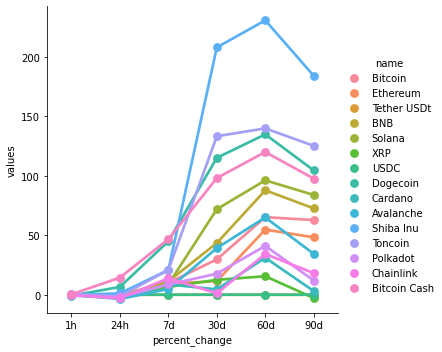

In [31]:
sns.catplot(x='percent_change', y= 'values', hue = 'name', data = df7, kind = 'point')

In [47]:
df10 = df72[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Shiba Inu'")
df10

,name,quote.USD.price,Timestamp
10,Shiba Inu,0.00003,2024-03-27 16:29:30.233655
25,Shiba Inu,0.00003,2024-03-27 16:29:30.233655
40,Shiba Inu,0.00003,2024-03-27 16:29:36.108333
55,Shiba Inu,0.00003,2024-03-27 16:29:36.108333
70,Shiba Inu,0.00003,2024-03-27 16:29:41.374617
85,Shiba Inu,0.00003,2024-03-27 16:29:41.374617
100,Shiba Inu,0.00003,2024-03-27 16:40:04.240659
115,Shiba Inu,0.00003,2024-03-27 16:40:04.240659
130,Shiba Inu,0.00003,2024-03-27 16:40:10.002343
145,Shiba Inu,0.00003,2024-03-27 16:40:10.002343


<AxesSubplot:xlabel='Timestamp', ylabel='quote.USD.price'>

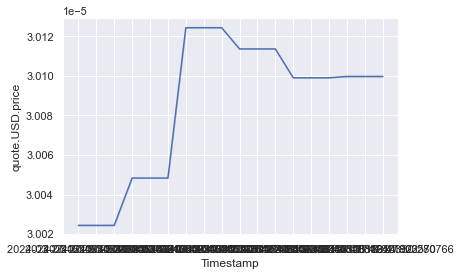

In [48]:
sns.set_theme(style ="darkgrid")
sns.lineplot(x='Timestamp', y= "quote.USD.price", data = df10)